<a href="https://colab.research.google.com/github/FranziskoB/Analise_correspondencia_simples_multipla/blob/main/R_Analise_Correspondencia_simples_multi_Exemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Análise de Correspondência Simples

Dataset sobre perfis de invetimento e os tipos de investimento ligados a esses perfis.

##Importando bibliotecas

In [ ]:
if(!"htmltools" %in% installed.packages()){
    install.packages("htmltools", version='0.5.4')}
library(htmltools)

In [ ]:
if(!"FactoMineR" %in% installed.packages()){ #Se aparecer um erro, reinicie o ambiente de execução e tente novamente
    install.packages("FactoMineR")} 
    library(FactoMineR)

In [ ]:

if(!"sjPlot" %in% installed.packages()){
    install.packages("sjPlot")}
if(!"amap" %in% installed.packages()){
    install.packages("amap")}
if(!"ade4" %in% installed.packages()){
    install.packages("ade4")} 
if(!"openxlsx" %in% installed.packages()){
    install.packages("openxlsx")} 
if(!"ggrepel" %in% installed.packages()){
    install.packages("ggrepel")} 
if(!"IRdisplay" %in% installed.packages()){
    install.packages("IRdisplay")}
library(magrittr)
library(knitr)
library(amap)
library(ade4)
library(sjPlot)
library(openxlsx)
library(tibble)
library(ggrepel)
library(dplyr)
library(tidyverse)
library(IRdisplay)

##Carregamento da base de dados 

In [ ]:
load(url("https://github.com/FranziskoB/Analise_correspondencia_simples_multipla/raw/main/dados/perfil_investidor_aplicacao.RData"))

Visualização da base de dados

In [ ]:
head(perfil_investidor_aplicacao,10)

estudante,perfil,aplicacao
<chr>,<fct>,<fct>
Gabriela,Conservador,Poupanca
Luiz Felipe,Conservador,Poupanca
Patrícia,Conservador,Poupanca
Gustavo,Conservador,Poupanca
Letícia,Conservador,Poupanca
Ovídio,Conservador,Poupanca
Leonor,Conservador,Poupanca
Dalila,Conservador,Poupanca
Antônio,Conservador,CDB


##Tabelas de frequência das variáveis

In [ ]:
summary(perfil_investidor_aplicacao)

  estudante                 perfil      aplicacao 
 Length:100         Conservador:17   Poupanca:15  
 Class :character   Moderado   :25   CDB     :40  
 Mode  :character   Agressivo  :58   Acoes   :45  

## 1ª Parte: Análise da associação por meio de tabelas

Tabela de contingência com frequências absolutas observadas

In [ ]:
tabela_contingencia <- table(perfil_investidor_aplicacao$perfil,
                             perfil_investidor_aplicacao$aplicacao)
tabela_contingencia


             
              Poupanca CDB Acoes
  Conservador        8   4     5
  Moderado           5  16     4
  Agressivo          2  20    36

Definição da quantidade de observações na tabela de contingência

In [ ]:
n <- sum(tabela_contingencia)
n

[1] 100

Estatística qui-quadrado e teste

In [ ]:
qui2 <- chisq.test(x = tabela_contingencia)
qui2

Warning message in chisq.test(x = tabela_contingencia):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tabela_contingencia
X-squared = 31.764, df = 4, p-value = 2.138e-06


Tabela de contingência com frequências absolutas observadas

In [ ]:
qui2$observed

             
              Poupanca CDB Acoes
  Conservador        8   4     5
  Moderado           5  16     4
  Agressivo          2  20    36

Tabela de contingência com frequências absolutas esperadas

In [ ]:
qui2$expected

,Poupanca,CDB,Acoes
Conservador,2.55,6.8,7.65
Moderado,3.75,10.0,11.25
Agressivo,8.70,23.2,26.10


Tabela de contingência com frequências absolutas observadas e esperadas

In [ ]:
sjt.xtab(var.row = perfil_investidor_aplicacao$perfil,
         var.col = perfil_investidor_aplicacao$aplicacao,
         show.exp = TRUE)

Resíduos – diferenças entre frequências absolutas observadas e esperadas

In [ ]:
qui2$observed - qui2$expected

             
              Poupanca   CDB Acoes
  Conservador     5.45 -2.80 -2.65
  Moderado        1.25  6.00 -7.25
  Agressivo      -6.70 -3.20  9.90

Valores de qui-quadrado por célula

In [ ]:
((qui2$observed - qui2$expected)^2)/qui2$expected

             
                Poupanca        CDB      Acoes
  Conservador 11.6480392  1.1529412  0.9179739
  Moderado     0.4166667  3.6000000  4.6722222
  Agressivo    5.1597701  0.4413793  3.7551724

Resíduos padronizados

In [ ]:
qui2$residuals

             
                Poupanca        CDB      Acoes
  Conservador  3.4129224 -1.0737510 -0.9581095
  Moderado     0.6454972  1.8973666 -2.1615324
  Agressivo   -2.2715127 -0.6643638  1.9378267

Resíduos padronizados ajustados

In [ ]:
qui2$stdres

             
                Poupanca        CDB      Acoes
  Conservador  4.0632908 -1.5215594 -1.4180605
  Moderado     0.8084521  2.8284271 -3.3655013
  Agressivo   -3.8017282 -1.3234444  4.0318926

Mapa de calor dos resíduos padronizados ajustados

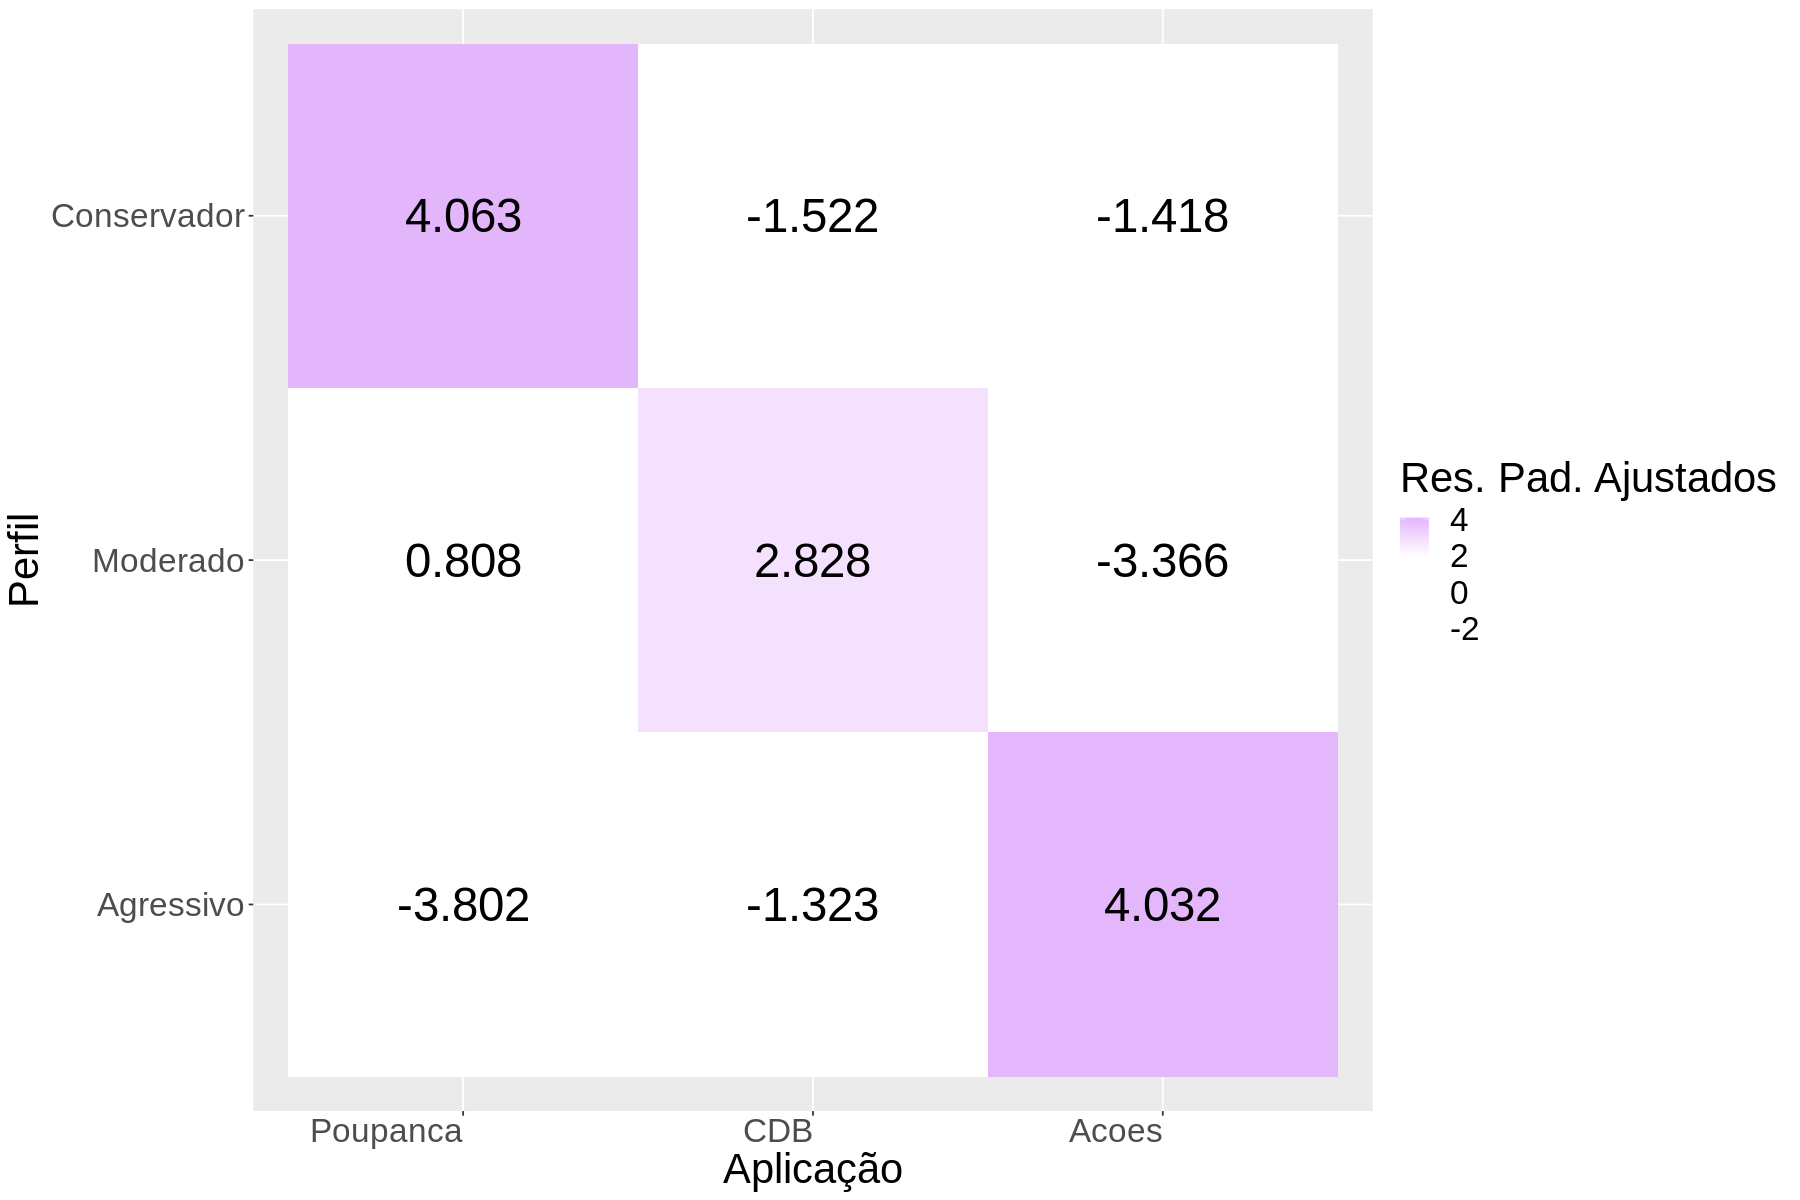

In [ ]:
options(repr.plot.width=15, repr.plot.height=10) #Configuração da largura e altura dos plots
data.frame(qui2$stdres) %>%
  rename(perfil = 1,
         aplicacao = 2) %>% 
  ggplot(aes(x = fct_rev(perfil), y = aplicacao,
             fill = Freq, label = round(Freq, 3))) +
  geom_tile() +
  geom_text(size = 10) +
  scale_fill_gradient2(low = "white", 
                       mid = "white", 
                       high = "purple",
                       midpoint = 1.96) +
  labs(x = 'Perfil', y = 'Aplicação', fill = "Res. Pad. Ajustados") +
  
  coord_flip()+
          theme(text = element_text(size=25),
        axis.text.x = element_text(angle=0, hjust=1))


##2ª Parte: Análise da associação por meio do mapa perceptual

Definição da matriz A

Resíduos padronizados (qui2$residuals) divididos pela raiz quadrada do tamanho da amostra (n)


In [ ]:
matrizA <- qui2$residuals/sqrt(n)
matrizA

             
                 Poupanca         CDB       Acoes
  Conservador  0.34129224 -0.10737510 -0.09581095
  Moderado     0.06454972  0.18973666 -0.21615324
  Agressivo   -0.22715127 -0.06643638  0.19378267

Definição da matriz W

Multiplicação da matriz A transposta pela matriz A

In [ ]:
matrizW <- t(matrizA) %*% matrizA
matrizW

,Poupanca,CDB,Acoes
Poupanca,0.17224476,-0.00930773,-0.09067015
CDB,-0.00930773,0.05194320,-0.04359870
Acoes,-0.09067015,-0.04359870,0.09345368


Definição da quantidade de dimensões

In [ ]:
qtde_dimensoes <- min(nrow(matrizW) - 1, ncol(matrizW) - 1)
qtde_dimensoes

[1] 2

Definição dos valores singulares

In [ ]:
VS_AV <- svd(matrizA, nu = qtde_dimensoes, nv = qtde_dimensoes)

Valores singulares de cada dimensão

In [ ]:
valores_singulares <- VS_AV$d[1:qtde_dimensoes]
valores_singulares

[1] 0.4829233 0.2905629

Autovalores (eigenvalues) de cada dimensão

In [ ]:
eigenvalues <- (valores_singulares)^2
eigenvalues

[1] 0.23321487 0.08442678

Cálculo da inércia principal total (a partir do qui-quadrado)

In [ ]:
inercia_total <- as.numeric(qui2$statistic/sum(tabela_contingencia))
inercia_total

[1] 0.3176416

Cálculo da variância explicada em cada dimensão

In [ ]:
variancia_explicada <- eigenvalues / inercia_total
variancia_explicada

[1] 0.7342075 0.2657925

Cálculo das massas das colunas (column profiles)

In [ ]:
soma_colunas <- apply(tabela_contingencia, MARGIN = 1, FUN = sum)
soma_colunas

Conservador    Moderado   Agressivo 
         17          25          58

Massas das colunas (column profiles)

In [ ]:
massa_colunas <- soma_colunas / n
massa_colunas

Conservador    Moderado   Agressivo 
       0.17        0.25        0.58

Cálculo das massas das linhas (row profiles)

In [ ]:
soma_linhas <- apply(tabela_contingencia, MARGIN = 2, FUN = sum)
soma_linhas

Poupanca      CDB    Acoes 
      15       40       45

Massas das linhas (row profiles)

In [ ]:
massa_linhas <- soma_linhas / n
massa_linhas

Poupanca      CDB    Acoes 
    0.15     0.40     0.45

Autovetores v das dimensões

In [ ]:
autovetor_v <-VS_AV$v
autovetor_v

-0.82178847,0.4179279
-0.09300977,-0.7689923
0.56215025,0.4837221


Autovetores u das dimensões

In [ ]:
autovetor_u <-VS_AV$u
autovetor_u

-0.6716248,0.6155649
-0.3980015,-0.7691520
0.6249119,0.1717122


Resumindo tudo até aqui

In [ ]:
data.frame(Dimensão = paste("Dimensão", 1:qtde_dimensoes),
           `Valor Singular` = valores_singulares,
           `Inércia Principal Parcial eigenvalues` = eigenvalues) %>%
  mutate(`Percentual da Inércia Principal Total` = (`Inércia.Principal.Parcial.eigenvalues`/inercia_total) * 100,
         `Percentual da Inércia Principal Total Acumulada` = cumsum(`Percentual da Inércia Principal Total`),
         Qui2 = qui2$statistic[[1]] * `Percentual da Inércia Principal Total` / n,
         `Valor Singular` = `Valor.Singular`,
         `Inércia Principal Parcial eigenvalues` = Inércia.Principal.Parcial.eigenvalues) %>%
  select(Dimensão, `Valor Singular`, `Inércia Principal Parcial eigenvalues`,
         Qui2, `Percentual da Inércia Principal Total`,
         `Percentual da Inércia Principal Total Acumulada`)

Dimensão,Valor Singular,Inércia Principal Parcial eigenvalues,Qui2,Percentual da Inércia Principal Total,Percentual da Inércia Principal Total Acumulada
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dimensão 1,0.4829233,0.23321487,23.321487,73.42075,73.42075
Dimensão 2,0.2905629,0.08442678,8.442678,26.57925,100.00000


## Calculando as coordenadas para plotar as categorias no mapa perceptual

Variável em linha na tabela de contingência ('perfil')
Coordenadas das abcissas

In [ ]:
coord_abcissas_perfil <- sqrt(valores_singulares[1]) * (massa_colunas^-0.5) * autovetor_u[,1]
coord_abcissas_perfil

Conservador    Moderado   Agressivo 
 -1.1319867  -0.5531638   0.5702219

Coordenadas das ordenadas

In [ ]:
coord_ordenadas_perfil <- sqrt(valores_singulares[2]) * (massa_colunas^-0.5) * autovetor_u[,2]
coord_ordenadas_perfil

Conservador    Moderado   Agressivo 
  0.8047656  -0.8292056   0.1215366

Variável em coluna na tabela de contingência ('aplicacao')
Coordenadas das abcissas

In [ ]:
coord_abcissas_aplicacao <- sqrt(valores_singulares[1]) * (massa_linhas^-0.5) * autovetor_v[,1]
coord_abcissas_aplicacao

Poupanca        CDB      Acoes 
-1.4745295 -0.1021969  0.5823515

Coordenadas das ordenadas



In [ ]:
coord_ordenadas_aplicacao <- sqrt(valores_singulares[2]) * (massa_linhas^-0.5) * autovetor_v[,2]
coord_ordenadas_aplicacao

Poupanca        CDB      Acoes 
 0.5816688 -0.6554085  0.3886957

Mapa perceptual

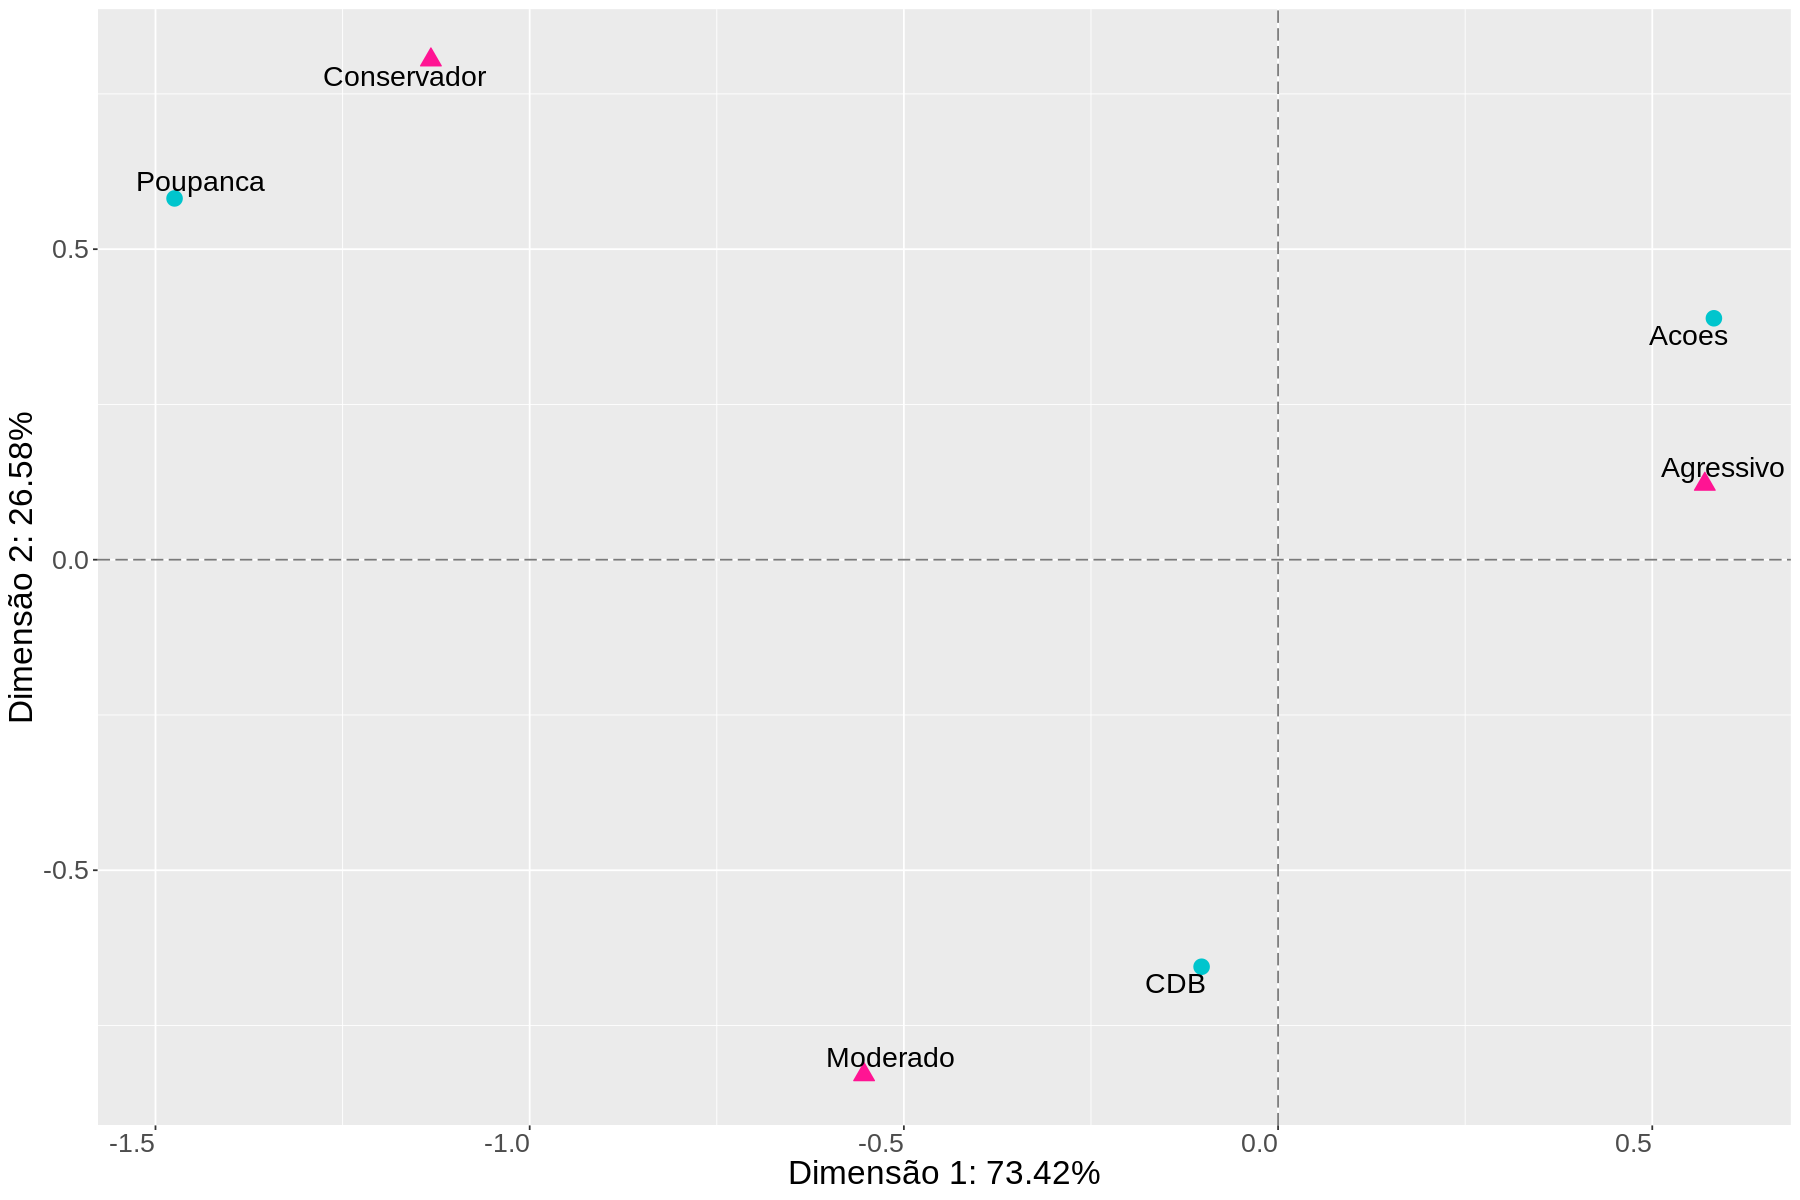

In [ ]:
cbind.data.frame(coord_abcissas_perfil, coord_ordenadas_perfil,
                 coord_abcissas_aplicacao, coord_ordenadas_aplicacao) %>%
  rename(dim_1_perfil = 1,
         dim_2_perfil = 2,
         dim_1_aplicacao = 3,
         dim_2_aplicacao = 4) %>%
  rownames_to_column() %>%
  setNames(make.names(names(.), unique = TRUE)) %>%
  mutate(aplicacao = rownames(data.frame(coord_abcissas_aplicacao,
                                         coord_ordenadas_aplicacao))) %>%
  rename(perfil = 1,
         dim_1_perfil = 2,
         dim_2_perfil = 3,
         dim_1_aplicacao = 4,
         dim_2_aplicacao = 5) %>%
  ggplot() +
  geom_point(aes(x = dim_1_perfil, y = dim_2_perfil),
             color = "deeppink1",
             fill = "deeppink1",
             shape = 24,
             size = 4) +
  geom_text_repel(aes(x = dim_1_perfil, y = dim_2_perfil, label = perfil),size=6) +
  geom_point(aes(x = dim_1_aplicacao, y = dim_2_aplicacao),
             color = "turquoise3",
             fill = "turquoise3",
             shape = 21,
             size = 4) +
  geom_text_repel(aes(x = dim_1_aplicacao, y = dim_2_aplicacao, label = aplicacao),size=6) +
  geom_vline(aes(xintercept = 0), linetype = "longdash", color = "grey48") +
  geom_hline(aes(yintercept = 0), linetype = "longdash", color = "grey48") +
  labs(x = paste("Dimensão 1:", paste0(round(variancia_explicada[1] * 100, 2),"%")),
       y = paste("Dimensão 2:", paste0(round(variancia_explicada[2] * 100, 2),"%"))) +
          theme(text = element_text(size=20),
        axis.text.x = element_text(angle=0, hjust=1))

O resultado pode ser obtido por meio da função 'CA' do pacote 'FactoMineR'

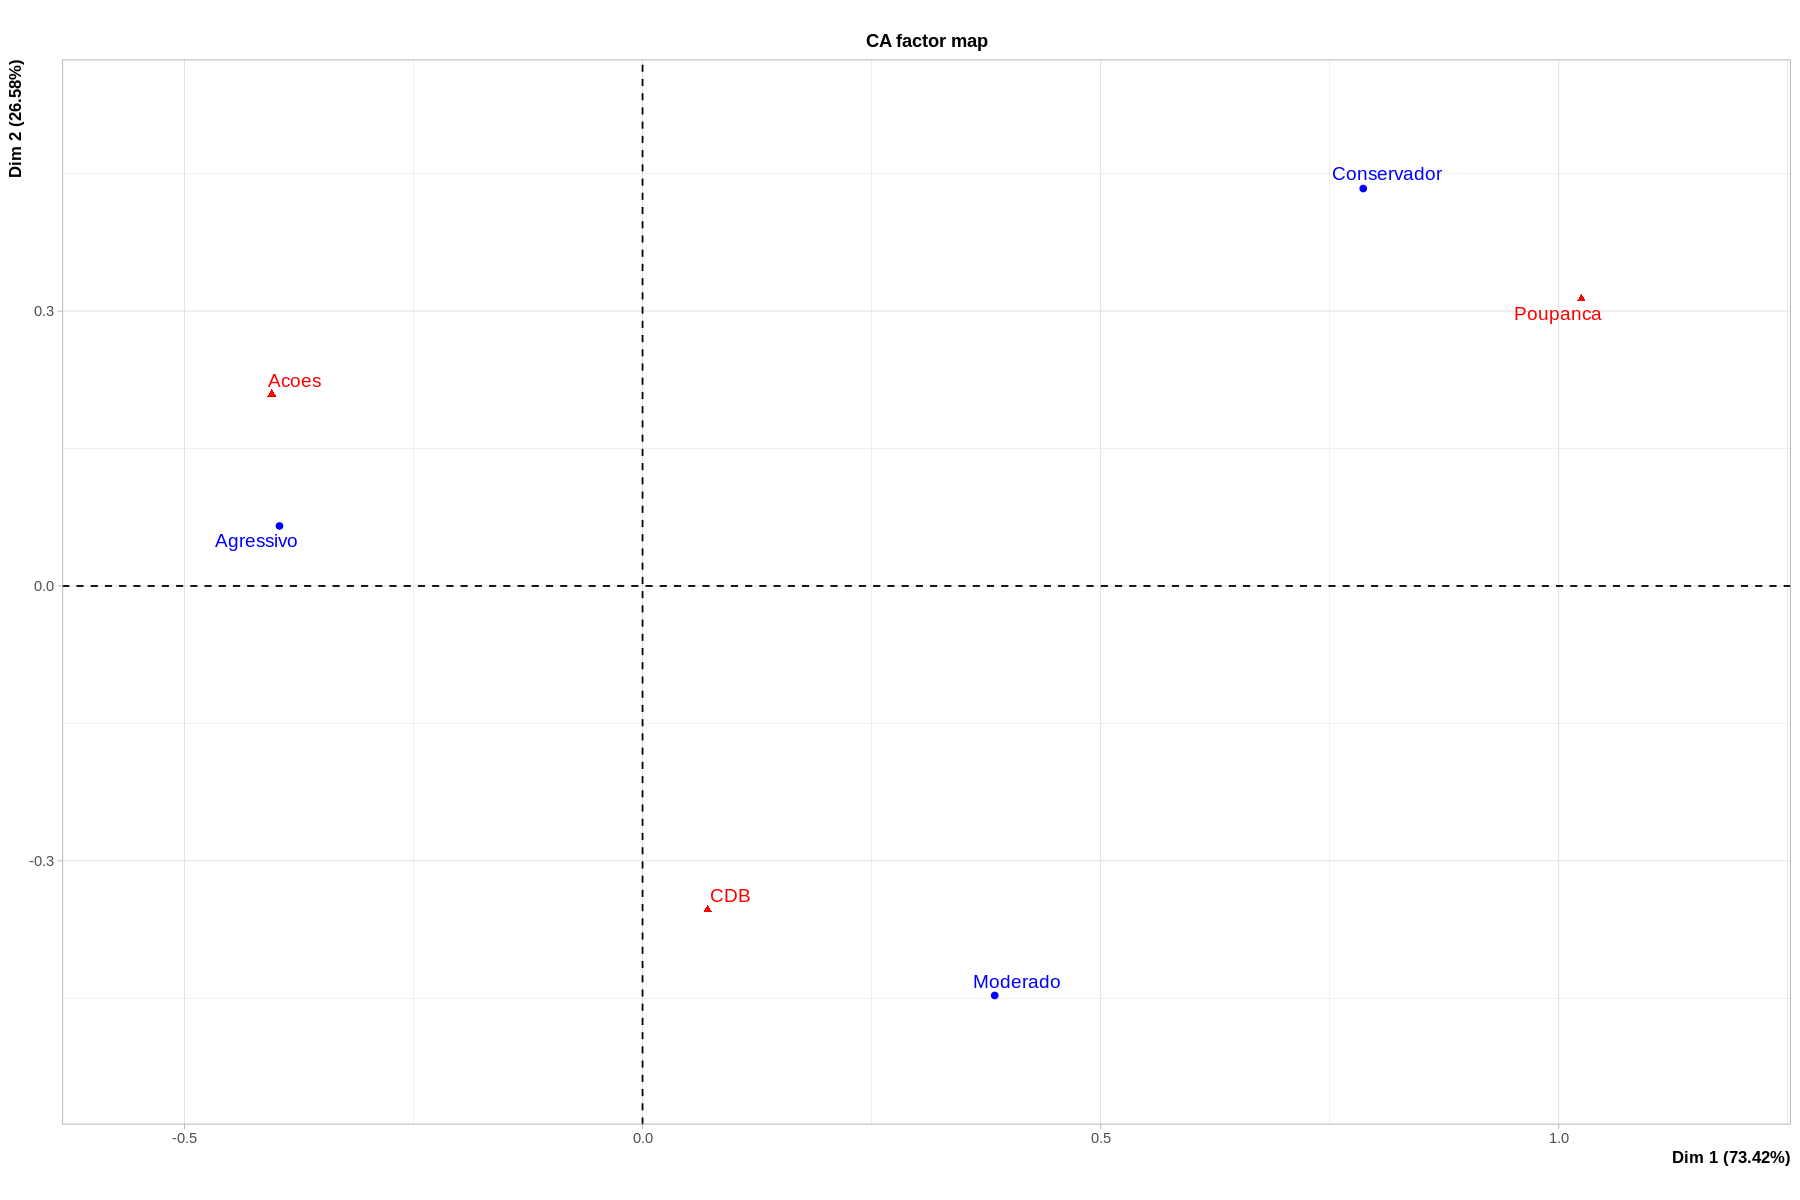

In [ ]:
anacor <- CA(tabela_contingencia, graph = TRUE)

Note que a função 'CA' gera um mapa perceptual construído com coordenadas
definidas de maneira diferente em relação às calculadas antes.Entretanto, as proporções das proximidades entre as categorias das variáveis permanecem as mesmas, assim como os percentuais da inércia principal total por dimensão!

#Análise de Correspondência Múltipla (ACM)

Dataset sobre perfis de invetimento e os tipos de investimento ligados a esses perfis juntamento com outras informações sobre a pessoa.

##Carregamento da base de dados

In [ ]:
load(url("https://github.com/FranziskoB/Analise_correspondencia_simples_multipla/raw/main/dados/perfil_investidor_aplicacao_estadocivil.RData"))


In [ ]:
head(perfil_investidor_aplicacao_estadocivil,10)

estudante,perfil,aplicacao,estado_civil
<chr>,<fct>,<fct>,<fct>
Gabriela,Conservador,Poupanca,Casado
Luiz Felipe,Conservador,Poupanca,Casado
Patrícia,Conservador,Poupanca,Casado
Gustavo,Conservador,Poupanca,Solteiro
Letícia,Conservador,Poupanca,Casado
Ovídio,Conservador,Poupanca,Casado
Leonor,Conservador,Poupanca,Casado
Dalila,Conservador,Poupanca,Casado
Antônio,Conservador,CDB,Casado


Tabelas de frequência das variáveis qualitativas

In [ ]:
summary(perfil_investidor_aplicacao_estadocivil)

  estudante                 perfil      aplicacao    estado_civil
 Length:100         Conservador:17   Poupanca:15   Solteiro:57   
 Class :character   Moderado   :25   CDB     :40   Casado  :43   
 Mode  :character   Agressivo  :58   Acoes   :45                 

Tabelas de contingência
Perfil x Aplicação

In [ ]:
sjt.xtab(var.row = perfil_investidor_aplicacao_estadocivil$perfil,
         var.col = perfil_investidor_aplicacao_estadocivil$aplicacao,
         show.exp = TRUE,
         show.row.prc = TRUE,
         show.col.prc = TRUE) 

Perfil x Estado Civil

In [ ]:
library(sjPlot)
sjPlot::sjt.xtab(var.row = perfil_investidor_aplicacao_estadocivil$perfil,
         var.col = perfil_investidor_aplicacao_estadocivil$estado_civil,
         show.exp = TRUE,
         show.row.prc = TRUE,
         show.col.prc = TRUE)


Aplicação x Estado Civil

In [ ]:
print(sjt.xtab(var.row = perfil_investidor_aplicacao_estadocivil$aplicacao,
         var.col = perfil_investidor_aplicacao_estadocivil$estado_civil,
         show.exp = TRUE,
         show.row.prc = TRUE,
         show.col.prc = TRUE))

Matriz Binária e Matriz de Burt

Matriz binária

In [ ]:
matriz_binaria <- matlogic(perfil_investidor_aplicacao_estadocivil[,2:4])
head(matriz_binaria,10)

,perfil.Agressivo,perfil.Conservador,perfil.Moderado,aplicacao.Acoes,aplicacao.CDB,aplicacao.Poupanca,estado_civil.Casado,estado_civil.Solteiro
1,1,0,0,1,0,0,0,1
2,1,0,0,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,1,0,0,1,0,0,1,0
5,1,0,0,1,0,0,0,1
6,1,0,0,1,0,0,0,1
7,1,0,0,1,0,0,0,1
8,1,0,0,1,0,0,0,1
9,1,0,0,0,1,0,0,1
10,1,0,0,0,1,0,0,1


Para a matriz de Burt

In [ ]:
matriz_burt <- burt(perfil_investidor_aplicacao_estadocivil[,2:4])
matriz_burt

,perfil.Agressivo,perfil.Conservador,perfil.Moderado,aplicacao.Acoes,aplicacao.CDB,aplicacao.Poupanca,estado_civil.Casado,estado_civil.Solteiro
perfil.Agressivo,17,0,0,8,4,5,5,12
perfil.Conservador,0,25,0,5,16,4,11,14
perfil.Moderado,0,0,58,2,20,36,41,17
aplicacao.Acoes,8,5,2,15,0,0,5,10
aplicacao.CDB,4,16,20,0,40,0,16,24
aplicacao.Poupanca,5,4,36,0,0,45,36,9
estado_civil.Casado,5,11,41,5,16,36,57,0
estado_civil.Solteiro,12,14,17,10,24,9,0,43


In [ ]:
verifica_burt <- t(matriz_binaria) %*% matriz_binaria

Elaboração da análise de correspondência múltipla (ACM)

In [ ]:
ACM <- dudi.acm(perfil_investidor_aplicacao_estadocivil[,2:4], scannf = FALSE)

Método da matriz de Burt B (componente 'co' do objeto 'ACM')
Visualização das coordenadas principais das categorias das variáveis

In [ ]:
round(ACM$co, 3)

,Comp1,Comp2
,<dbl>,<dbl>
perfil.Conservador,1.130,1.484
perfil.Moderado,0.747,-0.975
perfil.Agressivo,-0.653,-0.015
aplicacao.Poupanca,1.381,1.331
aplicacao.CDB,0.417,-0.935
aplicacao.Acoes,-0.831,0.388
estado_civil.Solteiro,-0.636,0.099
estado_civil.Casado,0.843,-0.131


 Visualização das coordenadas-padrão das categorias das variáveis
 Método da matriz binária (componente 'c1' do objeto 'ACM')

In [ ]:
round(ACM$c1, 3)

,CS1,CS2
,<dbl>,<dbl>
perfil.Conservador,1.456,2.247
perfil.Moderado,0.962,-1.476
perfil.Agressivo,-0.841,-0.022
aplicacao.Poupanca,1.780,2.016
aplicacao.CDB,0.538,-1.416
aplicacao.Acoes,-1.071,0.587
estado_civil.Solteiro,-0.820,0.150
estado_civil.Casado,1.086,-0.199


Massas das linhas e colunas (componente 'cw' do objeto 'ACM')

In [ ]:
ACM$cw

perfil.Conservador       perfil.Moderado      perfil.Agressivo 
           0.05666667            0.08333333            0.19333333 
   aplicacao.Poupanca         aplicacao.CDB       aplicacao.Acoes 
           0.05000000            0.13333333            0.15000000 
estado_civil.Solteiro   estado_civil.Casado 
           0.19000000            0.14333333

 Inércias principais (componente 'eig' do objeto 'ACM')

In [ ]:
ACM$eig

[1] 0.6023045 0.4359878 0.2764728 0.1798371 0.1720645

Portanto, há 5 dimensões. J-Q = 8-3 = 5

Percentual de variância explicada por dimensão

In [ ]:
perc_variancia <- (ACM$eig / sum(ACM$eig)) * 100
perc_variancia

[1] 36.13827 26.15927 16.58837 10.79022 10.32387

Visualização do percentual de variância explicada por dimensão

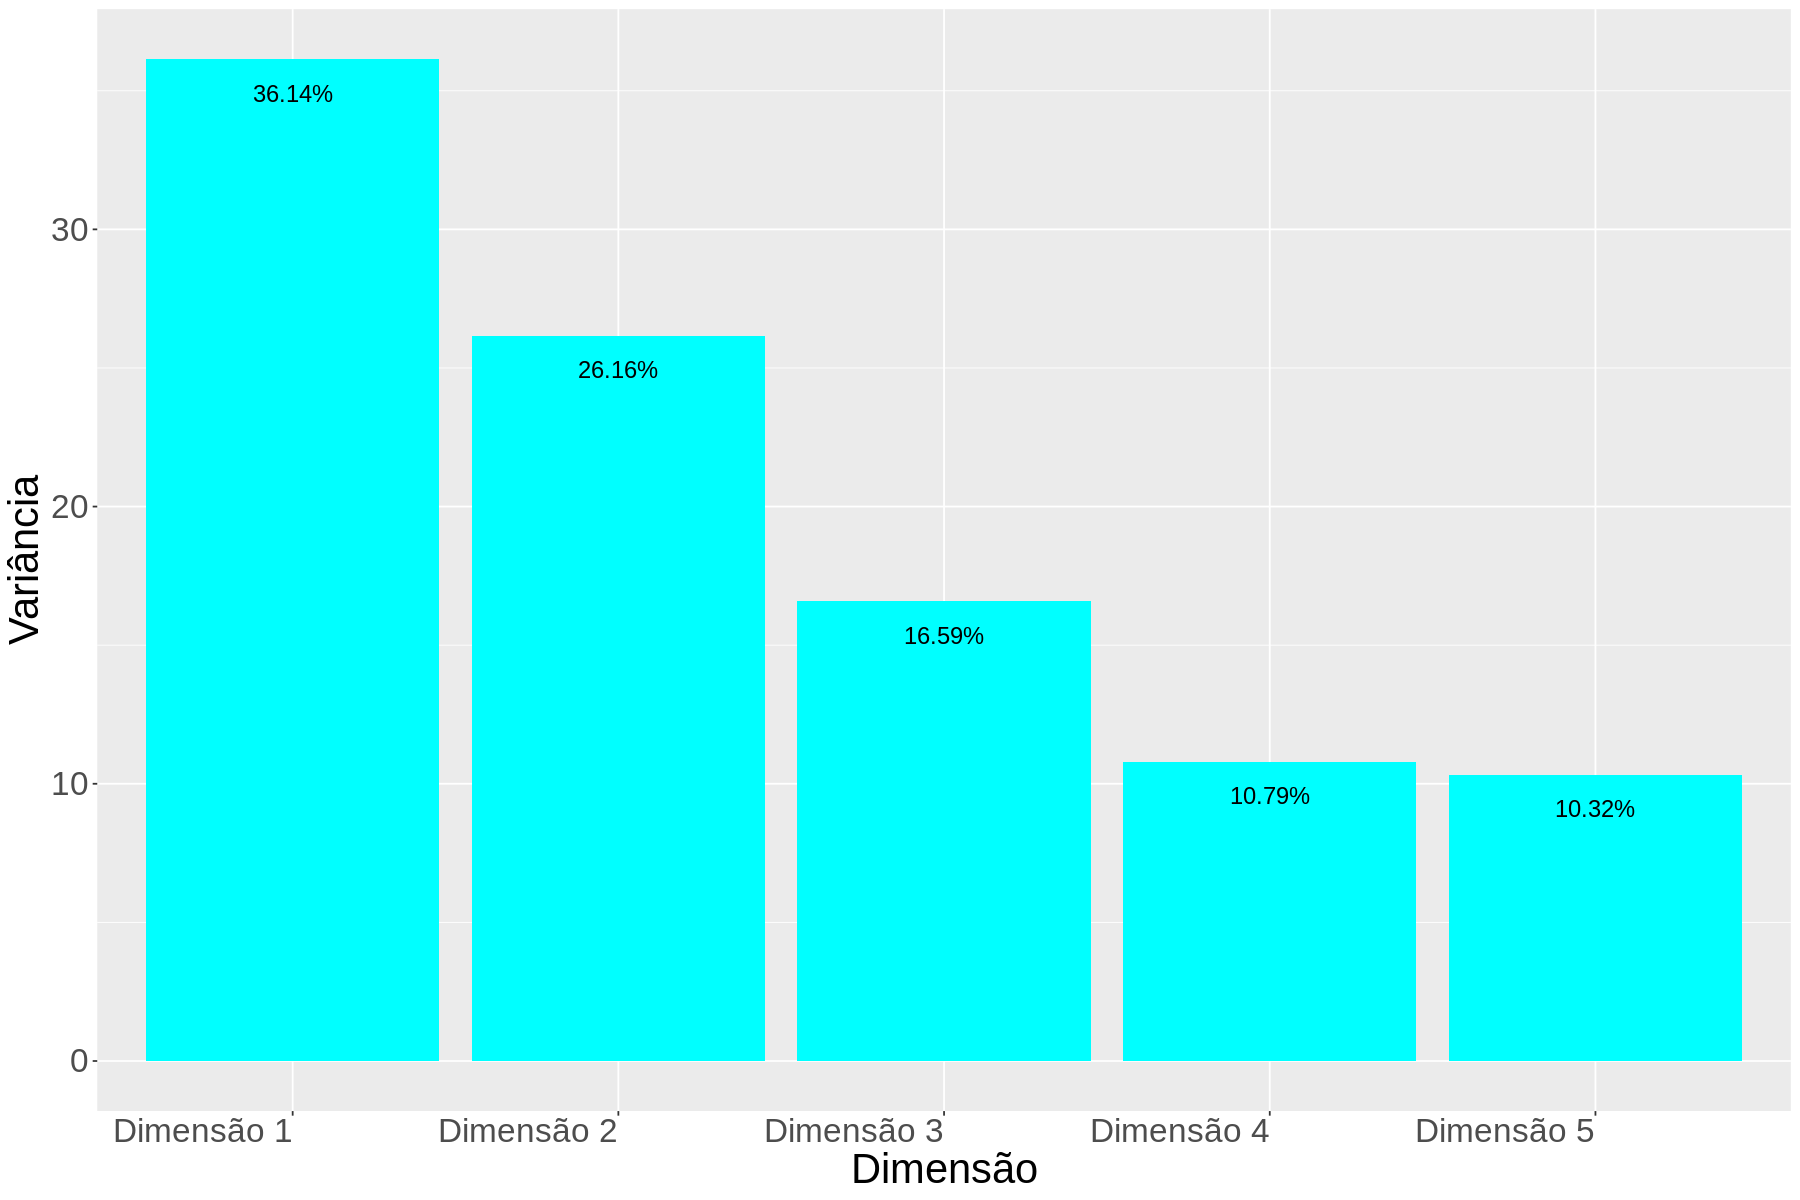

In [ ]:
data.frame(Dimensão = paste("Dimensão", 1:length(perc_variancia)),
           Variância = perc_variancia) %>%
  ggplot(aes(x = Dimensão,
             y = Variância,
             label = paste0(round(Variância, 2),"%"))) +
  geom_bar(stat = "identity", fill = "cyan") +
  geom_text(vjust = 2.5, size = 5) +
theme(text = element_text(size=25),
        axis.text.x = element_text(angle=0, hjust=1))

## Mapa perceptual na ACM

Definição da quantidade de categorias de cada variável qualitativa

In [ ]:
quant_categorias <- apply(perfil_investidor_aplicacao_estadocivil[,2:4],
                          MARGIN =  2,
                          FUN = function(x) nlevels(as.factor(x)))

Consolidando as coordenadas-padrão obtidas por meio da matriz binária ('c1')

In [ ]:
df_ACM <- data.frame(ACM$c1, Variável = rep(names(quant_categorias),
                                            quant_categorias))

Visualizando as coordenadas

In [ ]:
df_ACM %>%
  rownames_to_column() %>%
  rename(Categoria = 1) %>%
  mutate(Categoria = gsub("perfil.","", Categoria),
         Categoria = gsub("aplicacao.","", Categoria),
         Categoria = gsub("estado_civil.","", Categoria)) 

Categoria,CS1,CS2,Variável
<chr>,<dbl>,<dbl>,<chr>
Conservador,1.4559917,2.24690042,perfil
Moderado,0.9621926,-1.47612947,perfil
Agressivo,-0.8414944,-0.02231156,perfil
Poupanca,1.7798163,2.01602563,aplicacao
CDB,0.5375504,-1.41625275,aplicacao
Acoes,-1.0710947,0.58688279,aplicacao
Solteiro,-0.8195994,0.14983371,estado_civil
Casado,1.0864457,-0.19861678,estado_civil


Plotando o mapa perceptual

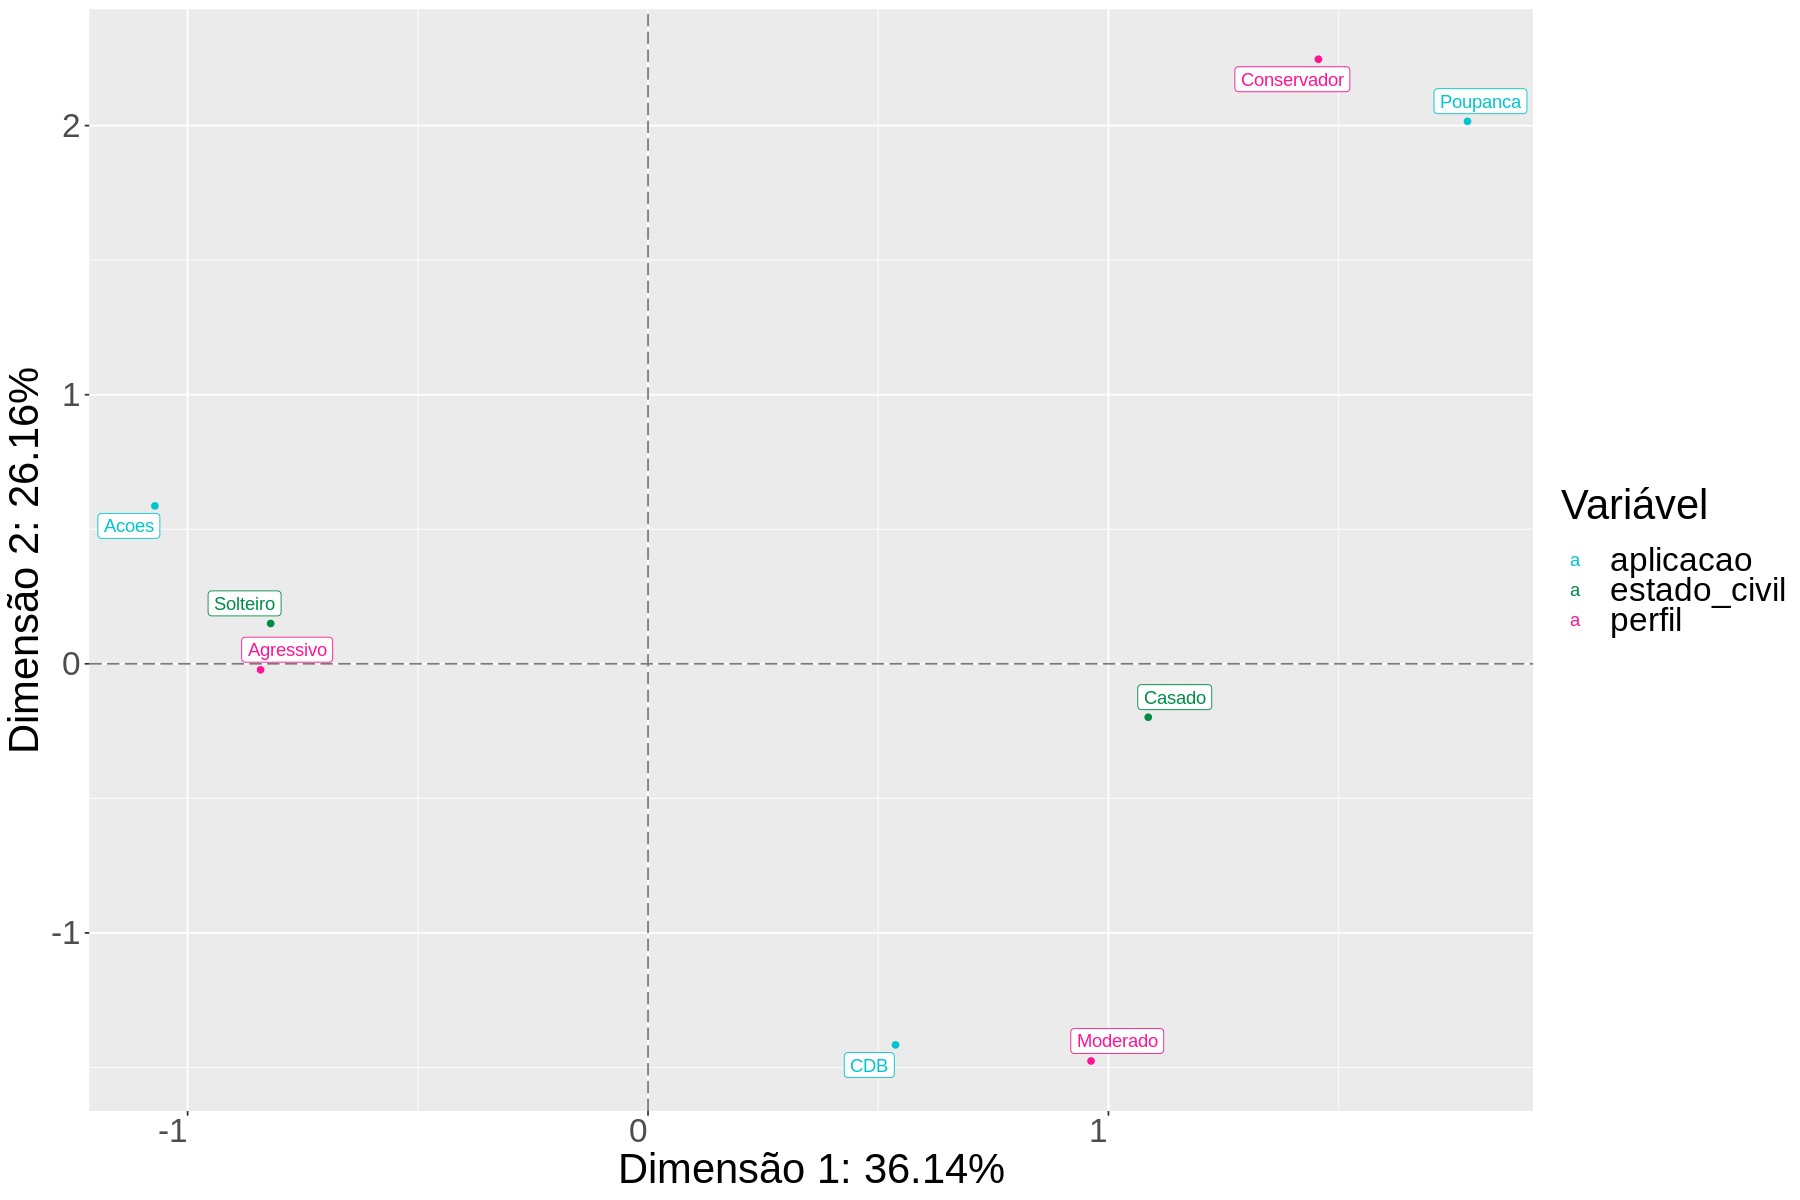

In [ ]:
df_ACM %>%
  rownames_to_column() %>%
  rename(Categoria = 1) %>%
  mutate(Categoria = gsub("perfil.","", Categoria),
         Categoria = gsub("aplicacao.","", Categoria),
         Categoria = gsub("estado_civil.","", Categoria)) %>%
  ggplot(aes(x = CS1, y = CS2, label = Categoria, color = Variável)) +
  geom_point() +
  geom_label_repel() +
  geom_vline(aes(xintercept = 0), linetype = "longdash", color = "grey48") +
  geom_hline(aes(yintercept = 0), linetype = "longdash", color = "grey48") +
  labs(x = paste("Dimensão 1:", paste0(round(perc_variancia[1], 2), "%")),
       y = paste("Dimensão 2:", paste0(round(perc_variancia[2], 2), "%"))) +
  scale_color_manual("Variável",
                     values = c("turquoise3", "springgreen4", "deeppink1")) +
 theme(text = element_text(size=25),
        axis.text.x = element_text(angle=0, hjust=1))

Coletando as coordenadas das observações

In [ ]:
ACM_observacoes_df <- data.frame(ACM$li)

Vamos acrescentar as informações das observacões ao mapa perceptual da ACM

Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


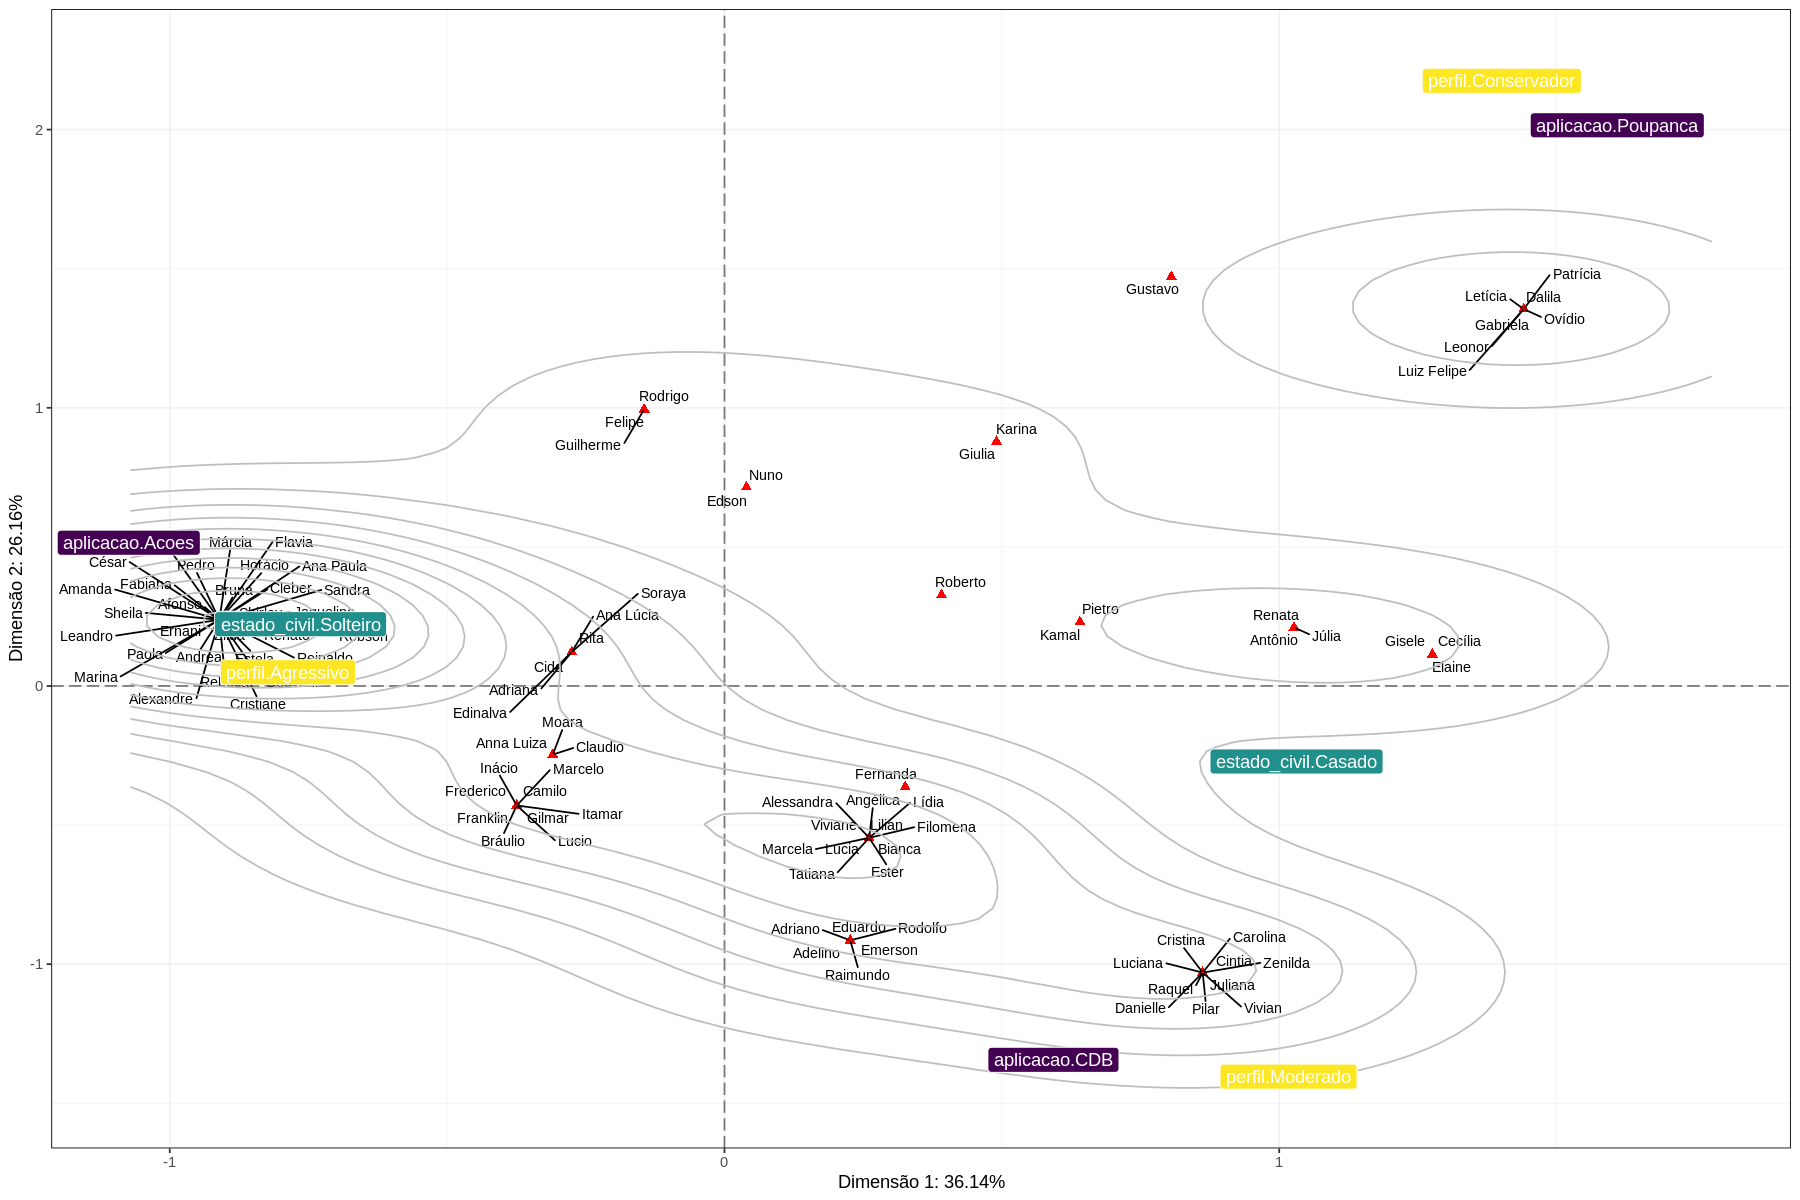

In [ ]:
ACM_observacoes_df %>% 
  ggplot(aes(x = Axis1, y = Axis2, label = perfil_investidor_aplicacao$estudante)) +
  geom_point(shape = 17, color = "red", size = 2) +
  geom_hline(yintercept = 0, linetype = "longdash", color = "grey48") +
  geom_vline(xintercept = 0, linetype = "longdash", color = "grey48") +
  geom_text_repel(max.overlaps = 100, size = 3) +
  geom_density2d(color = "gray") +
  geom_label_repel(data = df_ACM, 
                   aes(x = CS1, y = CS2, 
                       label = rownames(df_ACM), 
                       fill = Variável), 
                   color = "white") +
  labs(x = paste("Dimensão 1:", paste0(round(perc_variancia[1], 2), "%")),
       y = paste("Dimensão 2:", paste0(round(perc_variancia[2], 2), "%"))) +
  scale_fill_viridis_d() +
  theme(panel.background = element_rect("white"),
        panel.border = element_rect("NA"),
        panel.grid = element_line("gray95"),
        legend.position = "none")